In [5]:
## 1. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
## 2. Load Dataset

data = datasets.load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [7]:
## 3. Preprocessing Functions

def normalize(X):
    return MinMaxScaler().fit_transform(X)

def standardize(X):
    return StandardScaler().fit_transform(X)

def apply_pca(X, n_components=2):
    return PCA(n_components=n_components).fit_transform(X)

def transform_and_normalize(X):
    return normalize(standardize(X))

def transform_norm_pca(X):
    return apply_pca(transform_and_normalize(X))

In [8]:
## 4. Clustering Evaluation

def evaluate_clustering(X, labels):
    return {
        'Silhouette': round(silhouette_score(X, labels), 2),
        'Calinski-Harabasz': int(calinski_harabasz_score(X, labels)),
        'Davies-Bouldin': round(davies_bouldin_score(X, labels), 2)
    }

In [9]:
## 5. Run Clustering

def run_all_clustering(X, name):
    results = []

    # KMeans
    for k in [3, 4, 5]:
        model = KMeans(n_clusters=k, random_state=42).fit(X)
        res = evaluate_clustering(X, model.labels_)
        results.append(['KMeans', name, f'c={k}'] + list(res.values()))

    # Hierarchical
    for k in [3, 4, 5]:
        model = AgglomerativeClustering(n_clusters=k).fit(X)
        res = evaluate_clustering(X, model.labels_)
        results.append(['Hierarchical', name, f'c={k}'] + list(res.values()))

    # Mean Shift (auto bandwidth)
    try:
        ms = MeanShift(bandwidth=estimate_bandwidth(X, quantile=0.2)).fit(X)
        res = evaluate_clustering(X, ms.labels_)
        results.append(['MeanShift', name, f'c={len(np.unique(ms.labels_))}'] + list(res.values()))
    except:
        results.append(['MeanShift', name, 'c=NA', 'NA', 'NA', 'NA'])

    return results

In [10]:
## 6. All Variants of Data

variants = {
    'No Processing': X,
    'Normalized': normalize(X),
    'Transformed': standardize(X),
    'PCA': apply_pca(X),
    'T+N': transform_and_normalize(X),
    'T+N+PCA': transform_norm_pca(X)
}

all_results = []

for name, data_variant in variants.items():
    res = run_all_clustering(data_variant, name)
    all_results.extend(res)

In [11]:
## 7. Results DataFrame

results_df = pd.DataFrame(all_results, columns=['Method', 'Preprocessing', 'Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

# Display
print(results_df)

          Method  Preprocessing Clusters  Silhouette  Calinski-Harabasz  \
0         KMeans  No Processing      c=3        0.55                561   
1         KMeans  No Processing      c=4        0.50                529   
2         KMeans  No Processing      c=5        0.49                495   
3   Hierarchical  No Processing      c=3        0.55                558   
4   Hierarchical  No Processing      c=4        0.49                515   
5   Hierarchical  No Processing      c=5        0.48                488   
6      MeanShift  No Processing      c=2        0.69                509   
7         KMeans     Normalized      c=3        0.48                351   
8         KMeans     Normalized      c=4        0.44                313   
9         KMeans     Normalized      c=5        0.42                263   
10  Hierarchical     Normalized      c=3        0.50                349   
11  Hierarchical     Normalized      c=4        0.43                301   
12  Hierarchical     Norm

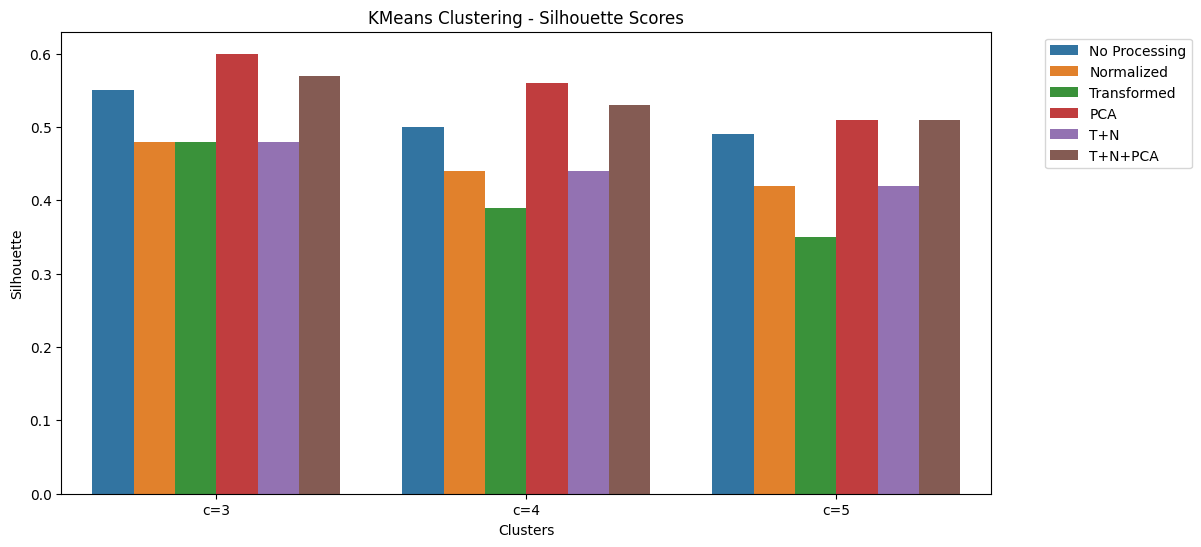

In [12]:
## 8. Visualization

plt.figure(figsize=(12,6))
sns.barplot(data=results_df[results_df['Method'] == 'KMeans'], x='Clusters', y='Silhouette', hue='Preprocessing')
plt.title('KMeans Clustering - Silhouette Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 9. Save CSV (Optional)

# results_df.to_csv("clustering_comparison_results.csv", index=False)